# Biodiversity in US National Parks

## Introduction
This project will investigate the sighting of species with differing conservation statuses in 4 US national parks: Great Smoky Mountains National Park, Yosemite National Park, Bryce National Park and Yellowstone National Park..

Data sources:

Both Observations.csv and Species_info.csv was provided by Codecademy.com.

Note: The data for this project is inspired by real data, but is mostly fictional.

## Project Scope
The following will be investigated throughout this analysis:

* How many sightings of flora and fauna were there in total and in each of the parks?
* How many different species were observed in each of the parks?
* Whick park had the most sightings?
* Which park has the greatest number of different species?
* What is the breakdown of each species type across the parks?
* How many species are of a conservational concern?
* How does the conservation status vary across the parks?


## Import of modules

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Initial exploration of the data files and tidying
### observations.csv

In [4]:
observation_data = pd.read_csv('observations.csv')

print(observation_data.head())
print(observation_data.info())

duplicated = (observation_data[observation_data.duplicated()])
print(duplicated)
observation_data = observation_data.drop_duplicates().reset_index()
print(observation_data.info())


            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None
              scientific_name                            park_name  \
7263   Echinochloa crus-galli  Great Smoky Mountains National Park

observations.csv consists of 3 columns:

* scientific_name - The scientific name of each species
* park_name - The name of the national park observed
* observations - The number of observations of that species in the previous 7 days

There are 23296 entries in the dataset however a selection of them are duplicates. These have been removed leaving 23281 entries.\
There are no missing values in the table.\
The datatypes initally appear to be correct for each column. 

The data now appears to be in order for initial processing.

### species_info.csv

In [5]:
species = pd.read_csv('species_info.csv')

print(species.head())
print(species.info())

duplicated = (species[species.duplicated()])
print(duplicated)

species = species.fillna(value={'conservation_status':'no_concern'})
print(species.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      

species_info.csv consists of 4 columns:

* category - The tpye of species
* scientific_name - The scientific name of each species
* common_names - The common names of each species
* conservation_status - The conservation status of the species where a missing value means that the species is not under threat

There are 5824 entries in the dataset with no duplicates
There are a large number of values missing in the conservation_status column. This is due to the species not being under threat. These values have been changed to no_concern.\
The datatypes initally appear to be correct for each column. 

The data now appears to be in order for initial processing.

## Analysis
### observations.csv

In [6]:
print(observation_data.scientific_name.nunique())
print(observation_data.park_name.unique())
print(observation_data.observations.sum())

print(observation_data.groupby('park_name').observations.sum())
print(observation_data.groupby('park_name').observations.nunique())

5541
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
3312429
park_name
Bryce National Park                     575901
Great Smoky Mountains National Park     431378
Yellowstone National Park              1442314
Yosemite National Park                  862836
Name: observations, dtype: int64
park_name
Bryce National Park                    142
Great Smoky Mountains National Park    129
Yellowstone National Park              149
Yosemite National Park                 151
Name: observations, dtype: int64


* Four different national parks have been examined in this study: Great Smoky Mountains National Park, Yosemite National Park, Bryce National Park and Yellowstone National Park.
* Over the 7 day period 5541 different species have been spotted in the 4 national parks and there were 3312429 sightings in total.
* Yellowstone National Park had the most sightings of species followed by Yosemite, Bryce and Great Smoky Mountain.
* Yosemite, Yellowstone and Bryce National Parks all had a similar number of different species whereas Great Smokey Mountains had less. 


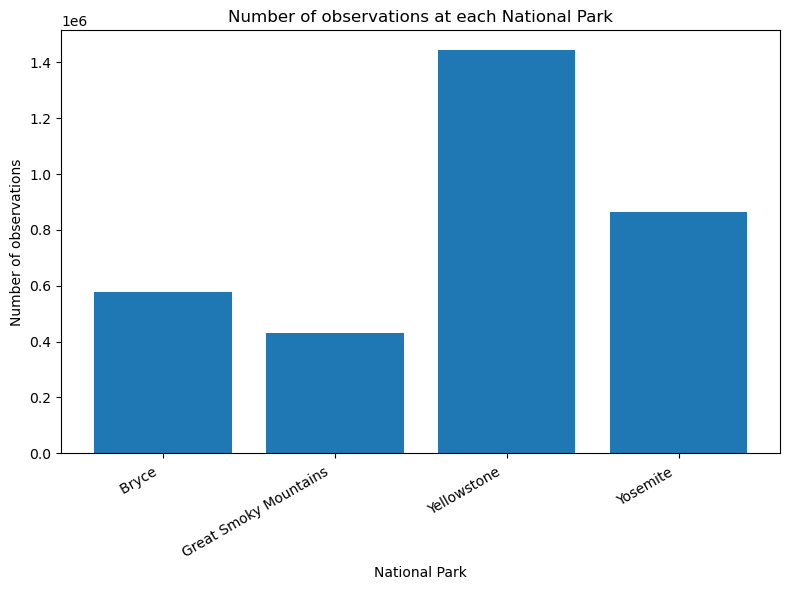

<Figure size 640x480 with 0 Axes>

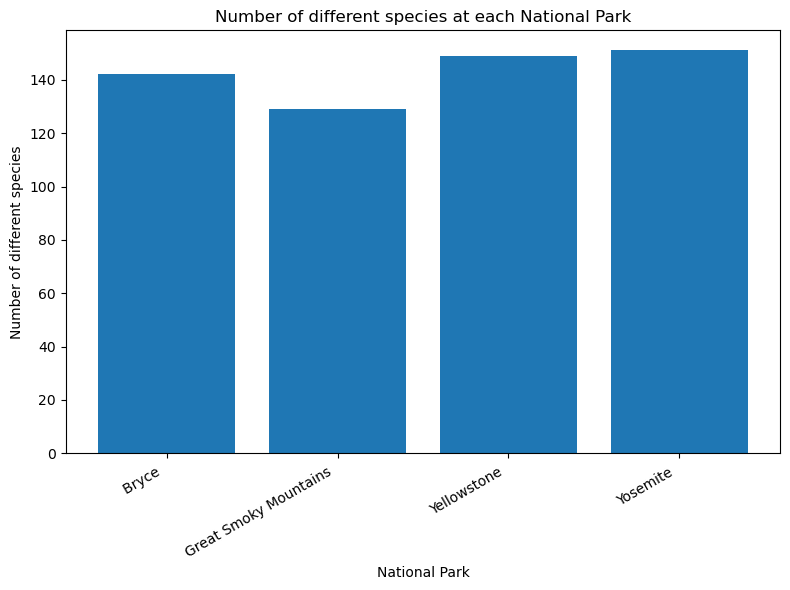

<Figure size 640x480 with 0 Axes>

In [29]:
plt.figure(figsize=(8, 6))
sum_of_observations = observation_data.groupby('park_name').observations.sum().reset_index()
sum_of_observations.park_name = sum_of_observations.park_name.replace('National Park', '', regex=True)
plt.bar(sum_of_observations.park_name, sum_of_observations.observations)
plt.xticks(rotation=30, ha='right')
plt.xlabel('National Park')
plt.ylabel('Number of observations')
plt.title('Number of observations at each National Park')
plt.tight_layout()
plt.savefig('bio_obs.png')
plt.show()
plt.clf()

plt.figure(figsize=(8, 6))
no_of_species = observation_data.groupby('park_name').observations.nunique().reset_index()
no_of_species.park_name = no_of_species.park_name.replace('National Park', '', regex=True)
plt.bar(no_of_species.park_name, no_of_species.observations)
plt.xticks(rotation=30, ha='right')
plt.xlabel('National Park')
plt.ylabel('Number of different species')
plt.title('Number of different species at each National Park')
plt.tight_layout()
plt.savefig('species_obs.png')
plt.show()
plt.clf()

### species_info.csv

In [68]:
print(species.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole          no_concern  
1                              American Bison, Bison          no_concern  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...          no_concern  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)          no_concern  
4                                      Wapiti Or Elk          no_concern  


In [8]:
print(species.category.value_counts())
print(species.category.value_counts()/len(species)*100)
print(species.conservation_status.value_counts()/len(species)*100)

endangered_species = species.groupby('category').conservation_status.value_counts().reset_index()
print(endangered_species.head())

category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: count, dtype: int64
category
Vascular Plant       76.751374
Bird                  8.945742
Nonvascular Plant     5.717720
Mammal                3.674451
Fish                  2.180632
Amphibian             1.373626
Reptile               1.356456
Name: count, dtype: float64
conservation_status
no_concern            96.720467
Species of Concern     2.764423
Endangered             0.274725
Threatened             0.171703
In Recovery            0.068681
Name: count, dtype: float64
    category conservation_status  count
0  Amphibian          no_concern     73
1  Amphibian  Species of Concern      4
2  Amphibian          Threatened      2
3  Amphibian          Endangered      1
4       Bird          no_concern    442


* A large majority (approximately 77%) of the different species listed are vascular plants followed by birds (9%) and nonvascular plants (6%). Mammels, fish, amphibians and reptiles each make up less than 5% of the total number of different species.
* The vast majority of the species listed are not a conservation cause of concern (97%).
* Birds, mammals and vascular plants have the greatest number of species of concern with mammals also having the most endangered species

conservation_status           category  Endangered  In Recovery  \
0                            Amphibian         1.0          NaN   
1                                 Bird         4.0          3.0   
2                                 Fish         3.0          NaN   
3                               Mammal         7.0          1.0   
4                    Nonvascular Plant         NaN          NaN   
5                              Reptile         NaN          NaN   
6                       Vascular Plant         1.0          NaN   

conservation_status  Species of Concern  Threatened  no_concern  
0                                   4.0         2.0        73.0  
1                                  72.0         NaN       442.0  
2                                   4.0         4.0       116.0  
3                                  28.0         2.0       176.0  
4                                   5.0         NaN       328.0  
5                                   5.0         NaN        74.0  
6

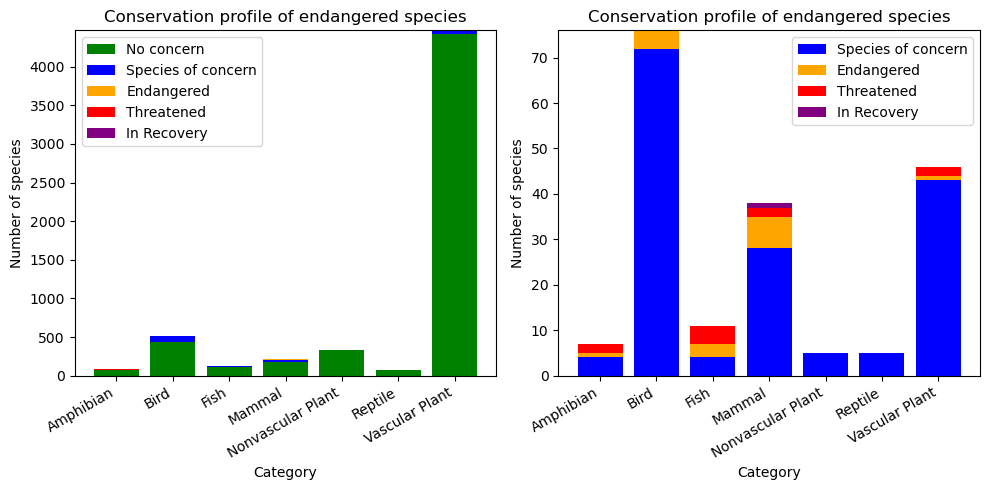

<Figure size 640x480 with 0 Axes>

In [30]:
pivot_endangered = endangered_species.pivot(columns='conservation_status', index='category', values='count').reset_index()
print(pivot_endangered)


plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
bottom2 = pivot_endangered['no_concern']
bottom3 = bottom2 + pivot_endangered['Species of Concern']
bottom4 = bottom3 + pivot_endangered['Endangered']
bottom5 = bottom4 + pivot_endangered['Threatened']
plt.bar(pivot_endangered['category'], pivot_endangered['no_concern'], color='green')
plt.bar(pivot_endangered['category'], pivot_endangered['Species of Concern'], bottom=bottom2, color='blue')
plt.bar(pivot_endangered['category'], pivot_endangered['Endangered'], bottom=bottom3, color='orange')
plt.bar(pivot_endangered['category'], pivot_endangered['Threatened'], bottom=bottom4, color='red')
plt.bar(pivot_endangered['category'], pivot_endangered['In Recovery'], bottom=bottom5, color='purple')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Category')
plt.ylabel('Number of species')
plt.title('Conservation profile of endangered species')
plt.legend(['No concern', 'Species of concern', 'Endangered', 'Threatened', 'In Recovery'], loc=2)


plt.subplot(1,2,2)
bottom3 = pivot_endangered['Species of Concern']
bottom4 = bottom3 + pivot_endangered['Endangered']
bottom5 = bottom4 + pivot_endangered['Threatened']
plt.bar(pivot_endangered['category'], pivot_endangered['Species of Concern'], color='blue')
plt.bar(pivot_endangered['category'], pivot_endangered['Endangered'], bottom=bottom3, color='orange')
plt.bar(pivot_endangered['category'], pivot_endangered['Threatened'], bottom=bottom4, color='red')
plt.bar(pivot_endangered['category'], pivot_endangered['In Recovery'], bottom=bottom5, color='purple')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Category')
plt.ylabel('Number of species')
plt.title('Conservation profile of endangered species')
plt.legend(['Species of concern', 'Endangered', 'Threatened', 'In Recovery'])
plt.tight_layout()
plt.savefig('bio_consver.png')
plt.show()
plt.clf()


### Combined plots

In [15]:
combined_data = pd.merge(observation_data, species, how='outer')
print(combined_data.head())

   index     scientific_name                            park_name  \
0      0  Vicia benghalensis  Great Smoky Mountains National Park   
1  10447  Vicia benghalensis               Yosemite National Park   
2  12455  Vicia benghalensis            Yellowstone National Park   
3  15518  Vicia benghalensis                  Bryce National Park   
4      1      Neovison vison  Great Smoky Mountains National Park   

   observations        category                        common_names  \
0            68  Vascular Plant  Purple Vetch, Reddish Tufted Vetch   
1           148  Vascular Plant  Purple Vetch, Reddish Tufted Vetch   
2           247  Vascular Plant  Purple Vetch, Reddish Tufted Vetch   
3           104  Vascular Plant  Purple Vetch, Reddish Tufted Vetch   
4            77          Mammal                       American Mink   

  conservation_status  
0          no_concern  
1          no_concern  
2          no_concern  
3          no_concern  
4          no_concern  


             park_name           category  observations
0  Bryce National Park          Amphibian          7542
1  Bryce National Park               Bird         58590
2  Bryce National Park               Fish         12823
3  Bryce National Park             Mammal         28830
4  Bryce National Park  Nonvascular Plant         32992
category                            park_name  Amphibian    Bird   Fish  \
0                         Bryce National Park       7542   58590  12823   
1         Great Smoky Mountains National Park       5876   42869   9482   
2                   Yellowstone National Park      19937  143535  31459   
3                      Yosemite National Park      11713   86612  19137   

category  Mammal  Nonvascular Plant  Reptile  Vascular Plant  
0          28830              32992     8141          484125  
1          21056              24857     5841          363998  
2          70189              83021    20061         1216688  
3          42533              49783 

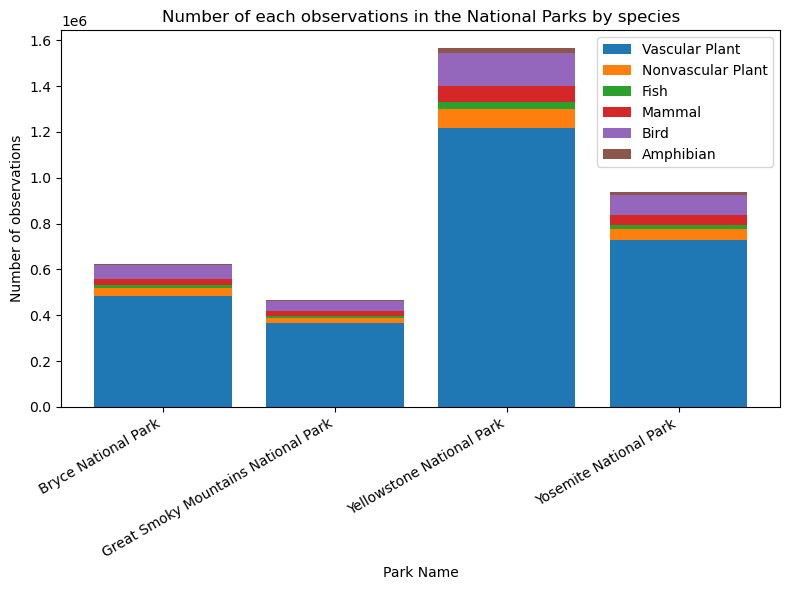

<Figure size 640x480 with 0 Axes>

In [33]:
category_observations = combined_data.groupby(['park_name', 'category']).observations.sum().reset_index()
print(category_observations.head())
pivot_cat_obs = category_observations.pivot(columns='category', index='park_name', values='observations').reset_index()
print(pivot_cat_obs)

bottom2 = pivot_cat_obs['Vascular Plant']
bottom3 = bottom2 + pivot_cat_obs['Nonvascular Plant']
bottom4 = bottom3 + pivot_cat_obs['Fish']
bottom5 = bottom4 + pivot_cat_obs['Mammal']
bottom6 = bottom5 + pivot_cat_obs['Bird']

plt.figure(figsize=(8, 6))
plt.bar(pivot_cat_obs['park_name'], pivot_cat_obs['Vascular Plant'])
plt.bar(pivot_cat_obs['park_name'], pivot_cat_obs['Nonvascular Plant'], bottom=bottom2)
plt.bar(pivot_cat_obs['park_name'], pivot_cat_obs['Fish'], bottom=bottom3)
plt.bar(pivot_cat_obs['park_name'], pivot_cat_obs['Mammal'], bottom=bottom4)
plt.bar(pivot_cat_obs['park_name'], pivot_cat_obs['Bird'], bottom=bottom5)
plt.bar(pivot_cat_obs['park_name'], pivot_cat_obs['Amphibian'], bottom=bottom6)
plt.xticks(rotation=30, ha='right')
plt.xlabel('Park Name')
plt.ylabel('Number of observations')
plt.title('Number of each observations in the National Parks by species')
plt.legend(['Vascular Plant', 'Nonvascular Plant', 'Fish', 'Mammal', 'Bird', 'Amphibian'])
plt.tight_layout()
plt.savefig('bio_spec_park.png')
plt.show()
plt.clf()

* The majority of species observed across the parks are vascular plants followed by birds.
* The proportions of each type of species is consistent across the four parks


In [17]:
print(combined_data.head())
conservation_numbers = combined_data.groupby('park_name').conservation_status.value_counts().reset_index()
print(conservation_numbers)

conservation_pivot = conservation_numbers.pivot(columns='conservation_status', index='park_name', values='count').reset_index()
print(conservation_pivot.head())

   index     scientific_name                            park_name  \
0      0  Vicia benghalensis  Great Smoky Mountains National Park   
1  10447  Vicia benghalensis               Yosemite National Park   
2  12455  Vicia benghalensis            Yellowstone National Park   
3  15518  Vicia benghalensis                  Bryce National Park   
4      1      Neovison vison  Great Smoky Mountains National Park   

   observations        category                        common_names  \
0            68  Vascular Plant  Purple Vetch, Reddish Tufted Vetch   
1           148  Vascular Plant  Purple Vetch, Reddish Tufted Vetch   
2           247  Vascular Plant  Purple Vetch, Reddish Tufted Vetch   
3           104  Vascular Plant  Purple Vetch, Reddish Tufted Vetch   
4            77          Mammal                       American Mink   

  conservation_status  
0          no_concern  
1          no_concern  
2          no_concern  
3          no_concern  
4          no_concern  
              

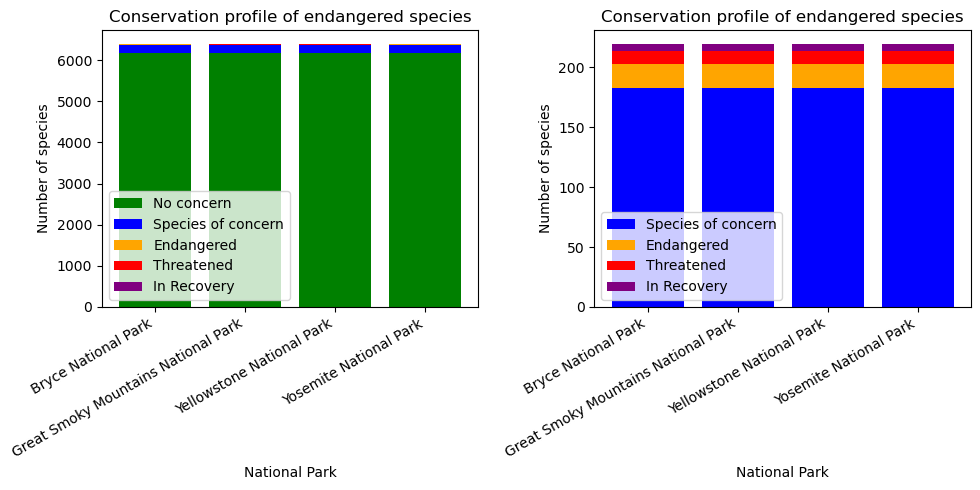

<Figure size 640x480 with 0 Axes>

In [36]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
bottom2 = conservation_pivot['no_concern']
bottom3 = bottom2 + conservation_pivot['Species of Concern']
bottom4 = bottom3 + conservation_pivot['Endangered']
bottom5 = bottom4 + conservation_pivot['Threatened']
plt.bar(conservation_pivot['park_name'], conservation_pivot['no_concern'], color='green')
plt.bar(conservation_pivot['park_name'], conservation_pivot['Species of Concern'], bottom=bottom2, color='blue')
plt.bar(conservation_pivot['park_name'], conservation_pivot['Endangered'], bottom=bottom3, color='orange')
plt.bar(conservation_pivot['park_name'], conservation_pivot['Threatened'], bottom=bottom4, color='red')
plt.bar(conservation_pivot['park_name'], conservation_pivot['In Recovery'], bottom=bottom5, color='purple')
plt.xticks(rotation=30, ha='right')
plt.xlabel('National Park')
plt.ylabel('Number of species')
plt.title('Conservation profile of endangered species')
plt.legend(['No concern', 'Species of concern', 'Endangered', 'Threatened', 'In Recovery'])

plt.subplot(1,2,2)
bottom3 = conservation_pivot['Species of Concern']
bottom4 = bottom3 + conservation_pivot['Endangered']
bottom5 = bottom4 + conservation_pivot['Threatened']
plt.bar(conservation_pivot['park_name'], conservation_pivot['Species of Concern'], color='blue')
plt.bar(conservation_pivot['park_name'], conservation_pivot['Endangered'], bottom=bottom3, color='orange')
plt.bar(conservation_pivot['park_name'], conservation_pivot['Threatened'], bottom=bottom4, color='red')
plt.bar(conservation_pivot['park_name'], conservation_pivot['In Recovery'], bottom=bottom5, color='purple')
plt.xticks(rotation=30, ha='right')
plt.xlabel('National Park')
plt.ylabel('Number of species')
plt.title('Conservation profile of endangered species')
plt.legend(['Species of concern', 'Endangered', 'Threatened', 'In Recovery'])
plt.tight_layout()
plt.savefig('bio_cons_park.png')
plt.show()
plt.clf()

* Each of the parks display a very similar conservation profile with the majority of species (~97%) not being a cause for concern


## Conclusions

* During a 7-day observational period there have been 3,300,000 sightings of 5541 different flora and fauna across the four US national parks studied
* Yellowstone National Park had the most sightings followed by Yosemite, Bryce and Great Smoky Mountain
* The majority of species observed are vascular plants followed by birds. This was consistent across each of the parks
* The vast majority of the flora and fauna observed (~97%) are not a conservational cause for concern with each with each of the parks displaying a similar conservation status profile 
* Birds, mammals and vascular plants have the greatest number of species of concern with mammals also having the most endangered species
